In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from datasets import load_dataset
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cnn-lena/lena.png


# Question 1: Implementing Rosenblatt’s Perceptron from Scratch

Generate Synthetic Dataset

In [2]:
def generate_dataset(n_samples=500, separation=3, random_seed=42):
    """
    Generates a linearly separable dataset with two classes.
    Class +1 centered at [separation, separation]
    Class -1 centered at [-separation, -separation]
    """
    np.random.seed(random_seed)
    n_half = n_samples // 2
    
    # Generate data for each class
    X_pos = np.random.randn(n_half, 2) + np.array([separation, separation])
    X_neg = np.random.randn(n_half, 2) + np.array([-separation, -separation])
    
    # Labels: +1 and -1
    y_pos = np.ones(n_half)
    y_neg = -np.ones(n_half)
    
    # Combine the two classes
    X = np.vstack((X_pos, X_neg))
    y = np.concatenate((y_pos, y_neg))
    
    # Shuffle dataset
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    return X[indices], y[indices]

def normalize_data(X):
    """Applies Z-score normalization (zero mean, unit variance)"""
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Generate and normalize the dataset
X, y = generate_dataset(n_samples=500, separation=1)
X = normalize_data(X)

Visualise Dataset

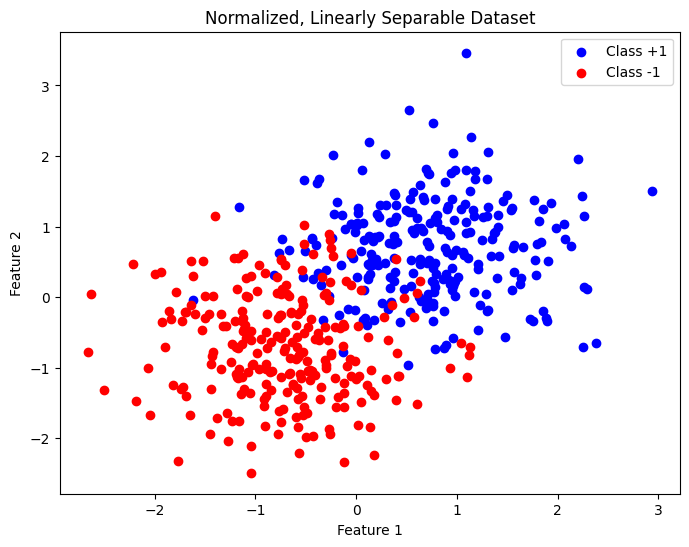

In [3]:
# Visualize the dataset
plt.figure(figsize=(8,6))
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class +1')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='red', label='Class -1')
plt.title("Normalized, Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Split dataset 80/20

In [4]:
# Split dataset into training and testing sets
def train_test_split(X, y, train_ratio=0.8):
    split_idx = int(len(X) * train_ratio)
    return X[:split_idx], y[:split_idx], X[split_idx:], y[split_idx:]

Activation Function

**Perceptron Implementation**

In [5]:
# Step function (activation function)
def step_function(z):
    return 1 if z >= 0 else -1

Train Perceptron

In [6]:
# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.5, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        errors = []
        # Shuffle the dataset at the start of each epoch
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for epoch in range(self.epochs):
            total_error = 0
            for i in range(n_samples):
                z = np.dot(X_shuffled[i], self.weights) + self.bias
                y_pred = step_function(z)

                if y_pred != y_shuffled[i]:  # Update weights if misclassified
                    update = self.learning_rate * y_shuffled[i]
                    self.weights += update * X_shuffled[i]
                    self.bias += update
                    total_error += 1
            errors.append(total_error)
            print(f"Epoch {epoch+1}/{self.epochs}, Errors: {total_error}")
        return errors

    def predict(self, X):
        return np.array([step_function(np.dot(x, self.weights) + self.bias) for x in X])


In [7]:

def plot_decision_boundary(X, y, model):
    # Define grid boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary with smooth contour
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

    # Scatter plot for dataset points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=80)

    # Add decision boundary line (if dataset is 2D)
    if model.weights[1] != 0:  
        x_vals = np.linspace(x_min, x_max, 100)
        y_vals = -(model.weights[0] * x_vals + model.bias) / model.weights[1]
        plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")

    # Improve visualization
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend(handles=scatter.legend_elements()[0], labels=["Class -1", "Class 1"])
    plt.show()

Epoch 1/50, Errors: 41
Epoch 2/50, Errors: 44
Epoch 3/50, Errors: 40
Epoch 4/50, Errors: 40
Epoch 5/50, Errors: 44
Epoch 6/50, Errors: 40
Epoch 7/50, Errors: 40
Epoch 8/50, Errors: 40
Epoch 9/50, Errors: 42
Epoch 10/50, Errors: 40
Epoch 11/50, Errors: 38
Epoch 12/50, Errors: 36
Epoch 13/50, Errors: 40
Epoch 14/50, Errors: 40
Epoch 15/50, Errors: 40
Epoch 16/50, Errors: 40
Epoch 17/50, Errors: 42
Epoch 18/50, Errors: 40
Epoch 19/50, Errors: 38
Epoch 20/50, Errors: 36
Epoch 21/50, Errors: 40
Epoch 22/50, Errors: 40
Epoch 23/50, Errors: 40
Epoch 24/50, Errors: 40
Epoch 25/50, Errors: 42
Epoch 26/50, Errors: 36
Epoch 27/50, Errors: 40
Epoch 28/50, Errors: 40
Epoch 29/50, Errors: 42
Epoch 30/50, Errors: 40
Epoch 31/50, Errors: 40
Epoch 32/50, Errors: 40
Epoch 33/50, Errors: 40
Epoch 34/50, Errors: 42
Epoch 35/50, Errors: 38
Epoch 36/50, Errors: 40
Epoch 37/50, Errors: 42
Epoch 38/50, Errors: 42
Epoch 39/50, Errors: 38
Epoch 40/50, Errors: 40
Epoch 41/50, Errors: 42
Epoch 42/50, Errors: 42
E

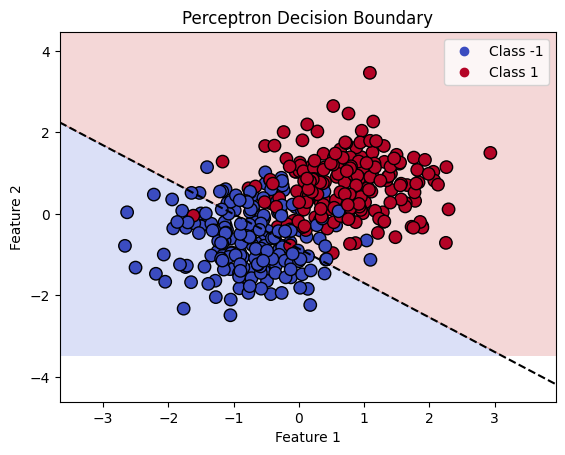

Test Accuracy: 89.00%


In [8]:
# Run the implementation


X_train, y_train, X_test, y_test = train_test_split(X, y)

# Train perceptron
perceptron = Perceptron(learning_rate=0.01, epochs=50)
errors = perceptron.fit(X_train, y_train)

# Plot decision boundary
plot_decision_boundary(X_train, y_train, perceptron)

# Evaluate on test set
y_pred = perceptron.predict(X_test)
accuracy = np.mean(y_pred == y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# Question 2: Implementing Convolution from Scratch

Loading image

In [9]:
# Load an image from Kaggle's input directory
image_path = "/kaggle/input/cnn-lena/lena.png"  # Update with actual dataset path
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = np.array(image)



**Convolution function**

In [10]:
import numpy as np

def manual_convolution(image, kernel, stride=1, padding='valid', mode='convolution'):
    """
    Perform 2D convolution or correlation on a grayscale image.
    :param image: Input grayscale image (2D array)
    :param kernel: Convolution kernel (2D array)
    :param stride: Stride for moving the kernel
    :param padding: 'valid' (no padding) or 'same' (zero-padding)
    :param mode: 'convolution' (flipped kernel) or 'correlation' (original kernel)
    :return: Processed image (2D array)
    """
    kernel = np.array(kernel)
    
    # Flip kernel for convolution mode
    if mode == 'convolution':
        kernel = np.flipud(np.fliplr(kernel))
    
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Handle padding
    if padding == 'same':
        pad_h = (kernel_h - 1) // 2
        pad_w = (kernel_w - 1) // 2
        image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    else:
        pad_h, pad_w = 0, 0

    # Compute output dimensions
    output_h = ((image.shape[0] - kernel_h) // stride) + 1
    output_w = ((image.shape[1] - kernel_w) // stride) + 1
    output = np.zeros((output_h, output_w))

    # Apply kernel over image with correct stride handling
    for i in range(0, output_h * stride, stride):
        for j in range(0, output_w * stride, stride):
            region = image[i:i + kernel_h, j:j + kernel_w]
            output[i // stride, j // stride] = np.sum(region * kernel)
    output = np.clip(output, 0, 255)

    return output


In [11]:
def normalize_image(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized = (image - min_val) / (max_val - min_val) * 255
    return normalized.astype(np.uint8)

Defining Kernels

In [12]:
blur_kernel = np.ones((3, 3)) / 9  # Blur
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
edge_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  # Sobel
symmetric_kernel = np.array([[0.25, 0.25], [0.25, 0.25]])
non_symmetric_kernel = np.array([[3, 0, -1], [1, -2, 0], [-1, 0, 1]])


In [13]:
# Apply manual convolution
blurred = manual_convolution(image, blur_kernel)
sharpened = manual_convolution(image, sharpen_kernel)
edged = manual_convolution(image, edge_kernel)
conv_symmetric = manual_convolution(image, symmetric_kernel)
conv_non_symmetric = manual_convolution(image, non_symmetric_kernel)

# Apply NumPy-based convolution
from scipy.signal import convolve2d
numpy_blurred = convolve2d(image, blur_kernel, mode='same')
numpy_sharpened = convolve2d(image, sharpen_kernel, mode='same')
numpy_edged = convolve2d(image, edge_kernel, mode='same')

# Apply correlation
corr_symmetric = manual_convolution(image, symmetric_kernel, mode='correlation')
corr_non_symmetric = manual_convolution(image, non_symmetric_kernel, mode='correlation')

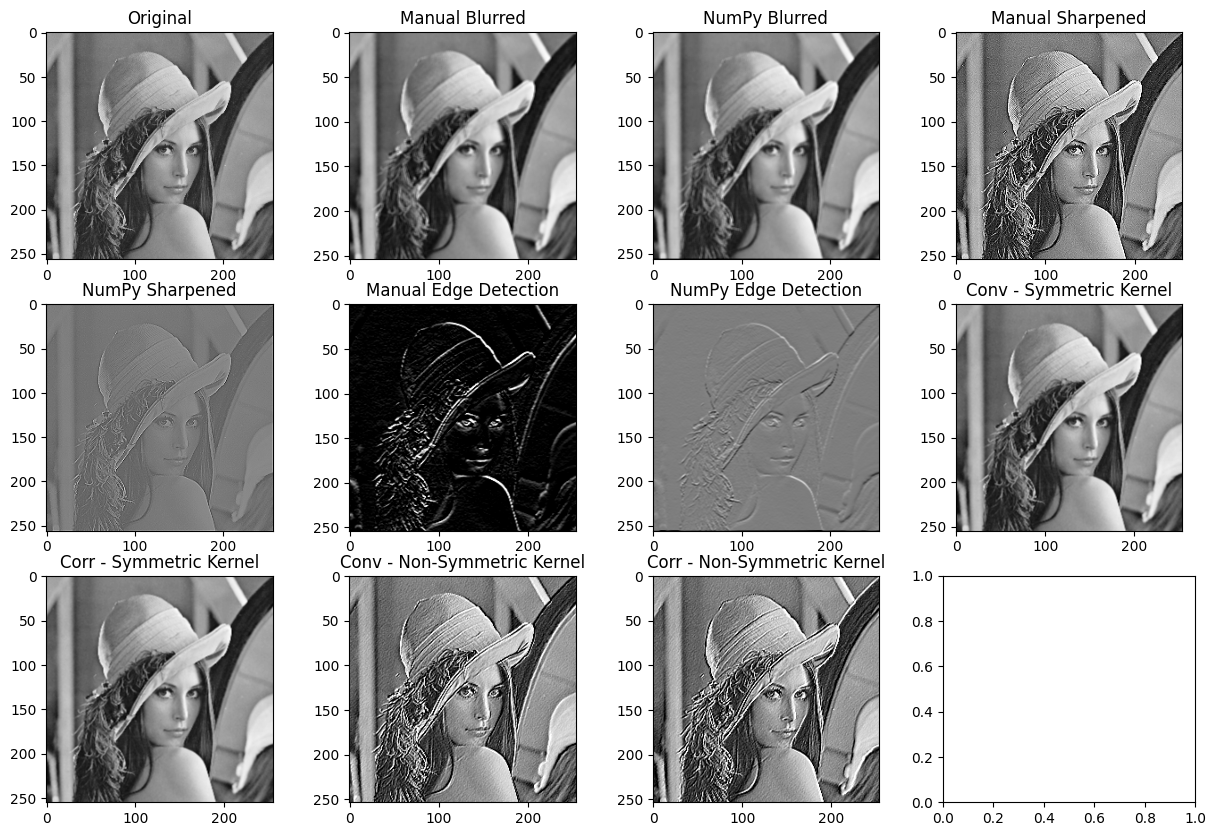

In [14]:
# Display images
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes[0, 0].imshow(image, cmap='gray'); axes[0, 0].set_title('Original')
axes[0, 1].imshow(blurred, cmap='gray'); axes[0, 1].set_title('Manual Blurred')
axes[0, 2].imshow(numpy_blurred, cmap='gray'); axes[0, 2].set_title('NumPy Blurred')
axes[0, 3].imshow(sharpened, cmap='gray'); axes[0, 3].set_title('Manual Sharpened')
axes[1, 0].imshow(numpy_sharpened, cmap='gray'); axes[1, 0].set_title('NumPy Sharpened')
axes[1, 1].imshow(edged, cmap='gray'); axes[1, 1].set_title('Manual Edge Detection')
axes[1, 2].imshow(numpy_edged, cmap='gray'); axes[1, 2].set_title('NumPy Edge Detection')
axes[1, 3].imshow(conv_symmetric, cmap='gray'); axes[1, 3].set_title('Conv - Symmetric Kernel')
axes[2, 0].imshow(corr_symmetric, cmap='gray'); axes[2, 0].set_title('Corr - Symmetric Kernel')
axes[2, 1].imshow(conv_non_symmetric, cmap='gray'); axes[2, 1].set_title('Conv - Non-Symmetric Kernel')
axes[2, 2].imshow(corr_non_symmetric, cmap='gray'); axes[2, 2].set_title('Corr - Non-Symmetric Kernel')
plt.show()


**Dataset Preparation**

# Question 3: Implementing a CNN for CIFAR-10

In [3]:
# CIFAR-10 dataset from Hugging Face
dataset = load_dataset("cifar10")

README.md:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/120M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [4]:
# Extract images and labels
train_images = np.array([np.array(image) for image in dataset["train"]["img"]])
train_labels = np.array(dataset["train"]["label"])
test_images = np.array([np.array(image) for image in dataset["test"]["img"]])
test_labels = np.array(dataset["test"]["label"])

# Normalize pixel values to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Split the training data into training and validation sets (80% training, 20% validation)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

**CNN CLASSIFIER**

In [65]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    
    # Fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Define the CNN model
model_aug = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    
    # Fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model_aug.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_aug.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Training without data augmentation

In [66]:
# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3418 - loss: 1.7825 - val_accuracy: 0.5600 - val_loss: 1.2368
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5761 - loss: 1.1988 - val_accuracy: 0.6154 - val_loss: 1.1029
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6500 - loss: 1.0045 - val_accuracy: 0.6576 - val_loss: 0.9665
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6988 - loss: 0.8607 - val_accuracy: 0.6723 - val_loss: 0.9474
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7382 - loss: 0.7493 - val_accuracy: 0.6978 - val_loss: 0.8842
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7670 - loss: 0.6639 - val_accuracy: 0.6977 - val_loss: 0.8899
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7897 - loss: 0.5937 - val_accuracy: 0.7140 - val_loss: 0.8752
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8127 - loss: 0.5284 - 

In [67]:
# Evaluate the model without augmentation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy (Without Augmentation): {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7129 - loss: 0.9758
Test Accuracy (Without Augmentation): 70.51%


Training with data augmentation

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

# Fit the data augmentation on the training data
datagen.fit(train_images)

# Train the model with data augmentation
history_aug = model_aug.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    epochs=20,
    validation_data=(val_images, val_labels))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.3123 - loss: 1.8297 - val_accuracy: 0.5378 - val_loss: 1.2930
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5203 - loss: 1.3470 - val_accuracy: 0.5950 - val_loss: 1.1502
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5706 - loss: 1.2024 - val_accuracy: 0.6327 - val_loss: 1.0714
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6049 - loss: 1.1102 - val_accuracy: 0.6522 - val_loss: 1.0193
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.6343 - loss: 1.0390 - val_accuracy: 0.6743 - val_loss: 0.9504
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6503 - loss: 0.9914 - val_accuracy: 0.6696 - val_loss: 0.9643
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6643 - loss: 0.9615 - val_accuracy: 0.6848 - val_loss: 0.9318
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6768 - loss: 0.92

In [69]:

# Evaluate the model with augmentation
test_loss_aug, test_acc_aug = model_aug.evaluate(test_images, test_labels)
print(f"Test Accuracy (With Augmentation): {test_acc_aug * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7461 - loss: 0.7447
Test Accuracy (With Augmentation): 74.93%


Feature Map

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


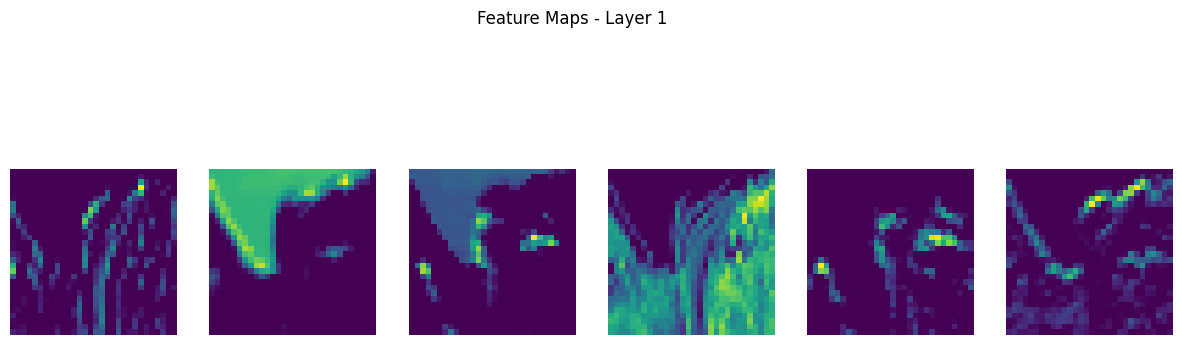

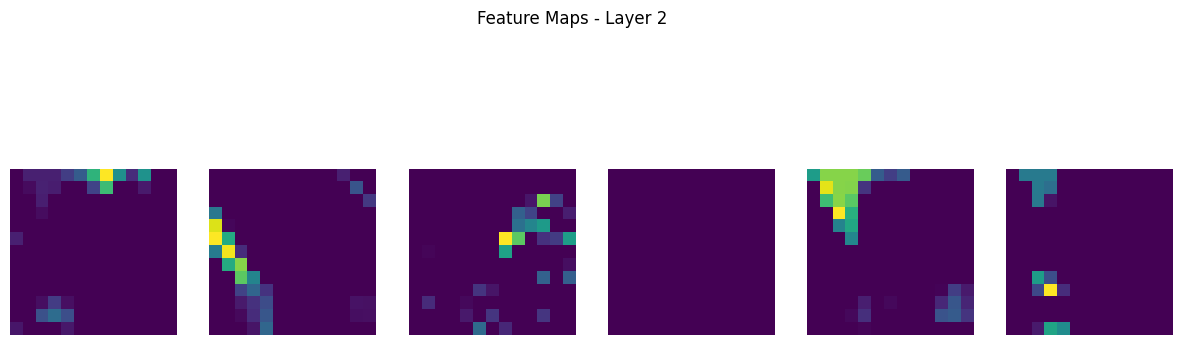

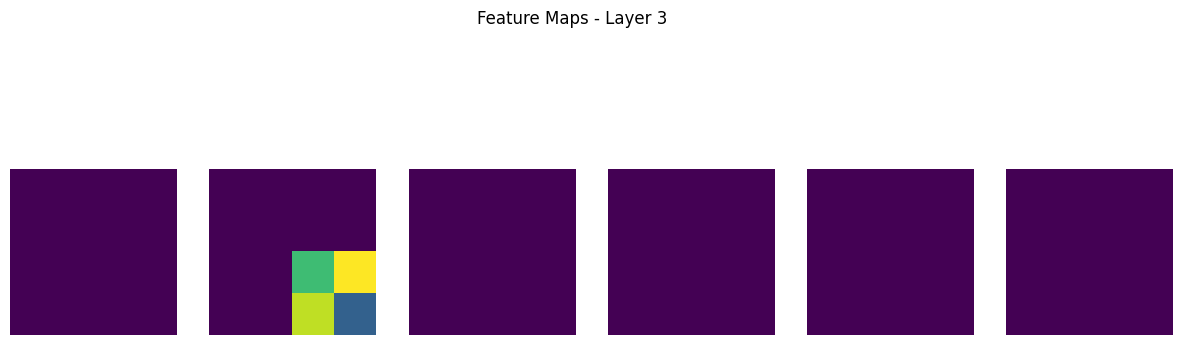

In [70]:
def visualize_feature_maps(model, image):
    # Use model.input if available; otherwise, use the input of the first layer.
    try:
        input_tensor = model.input
    except ValueError:
        input_tensor = model.layers[0].input

    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
    activation_model = models.Model(inputs=input_tensor, outputs=layer_outputs)
    activations = activation_model.predict(image.reshape(1, 32, 32, 3))
    
    for i, activation in enumerate(activations):
        num_filters = activation.shape[-1]
        fig, axes = plt.subplots(1, min(6, num_filters), figsize=(15, 5))
        fig.suptitle(f'Feature Maps - Layer {i+1}')
        for j in range(min(6, num_filters)):
            axes[j].imshow(activation[0, :, :, j], cmap='viridis')
            axes[j].axis('off')
        plt.show()
random_idx = np.random.randint(len(test_images))
visualize_feature_maps(model, test_images[random_idx])


**Ablation Study**

In [74]:
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
num_filters = [16, 32, 64]
num_layers = [3, 5, 7]

results = []

for lr in learning_rates:
    temp_model = models.clone_model(model)
    temp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
    history = temp_model.fit(train_images, train_labels, epochs=5, batch_size=32, verbose=0, validation_data=(val_images, val_labels))
    results.append((f'LR={lr}', history.history['val_accuracy'][-1]))

for bs in batch_sizes:
    history = model.fit(train_images, train_labels, epochs=5, batch_size=bs, verbose=0, validation_data=(val_images, val_labels))
    results.append((f'Batch={bs}', history.history['val_accuracy'][-1]))

for filters in num_filters:
    temp_model = models.Sequential([
        layers.Conv2D(filters, (3,3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
    temp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = temp_model.fit(train_images, train_labels, epochs=5, batch_size=32, verbose=0, validation_data=(val_images, val_labels))
    results.append((f'Filters={filters}', history.history['val_accuracy'][-1]))

# Display Results
print("Ablation Study Results:")
for res in results:
    print(f'{res[0]}: Accuracy={res[1]:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Ablation Study Results:
LR=0.001: Accuracy=0.6960
LR=0.01: Accuracy=0.0999
LR=0.1: Accuracy=0.0978
Batch=16: Accuracy=0.6942
Batch=32: Accuracy=0.6916
Batch=64: Accuracy=0.6885
Filters=16: Accuracy=0.5869
Filters=32: Accuracy=0.6194
Filters=64: Accuracy=0.6380


Performance Metrics

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate model performance
def evaluate_model(model, test_images, test_labels):
    y_pred_probs = model.predict(test_images)
    y_pred = y_pred_probs.argmax(axis=1)  # Get class with highest probability
    y_true = test_labels.argmax(axis=1)  # Convert one-hot to class index

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    return accuracy, precision, recall, f1, y_true, y_pred

# Evaluate both models
acc_no_aug, prec_no_aug, rec_no_aug, f1_no_aug, y_true_no_aug, y_pred_no_aug = evaluate_model(model, test_images, test_labels)
acc_aug, prec_aug, rec_aug, f1_aug, y_true_aug, y_pred_aug = evaluate_model(model_aug, test_images, test_labels)

# Print comparison table
import pandas as pd

data = {
    "Model": ["Without Augmentation", "With Augmentation"],
    "Accuracy": [acc_no_aug, acc_aug],
    "Precision": [prec_no_aug, prec_aug],
    "Recall": [rec_no_aug, rec_aug],
    "F1-Score": [f1_no_aug, f1_aug],
}

df = pd.DataFrame(data)
print(df)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
                  Model  Accuracy  Precision  Recall  F1-Score
0  Without Augmentation    0.7051   0.707421  0.7051  0.703228
1     With Augmentation    0.7493   0.749963  0.7493  0.742366


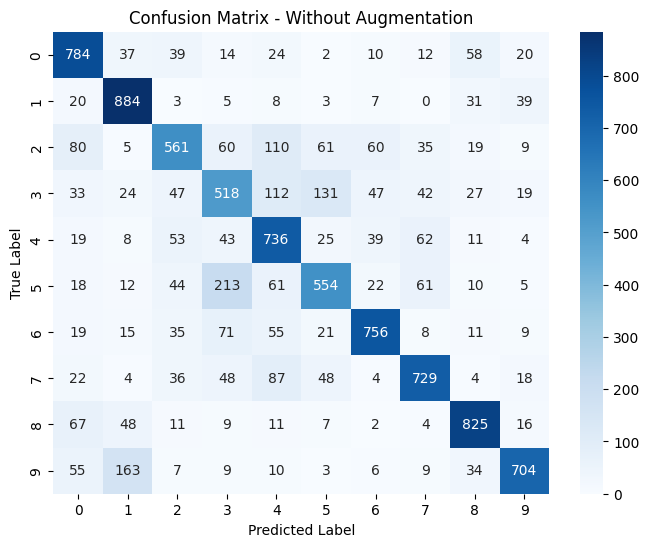

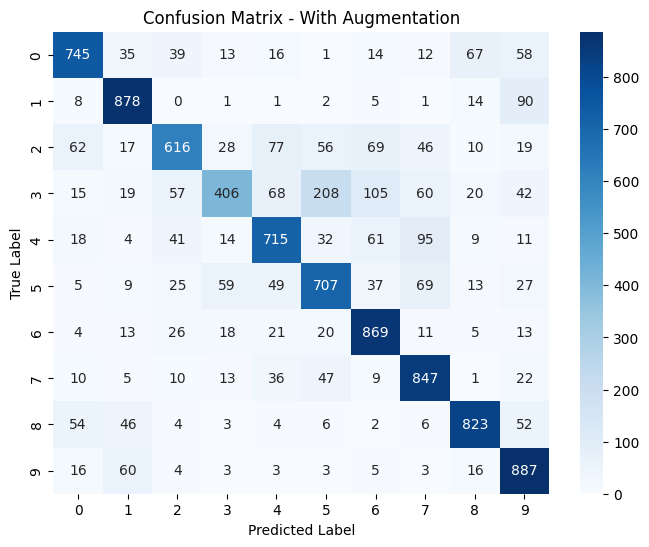

In [72]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Confusion matrix for both models
plot_confusion_matrix(y_true_no_aug, y_pred_no_aug, "Confusion Matrix - Without Augmentation")
plot_confusion_matrix(y_true_aug, y_pred_aug, "Confusion Matrix - With Augmentation")


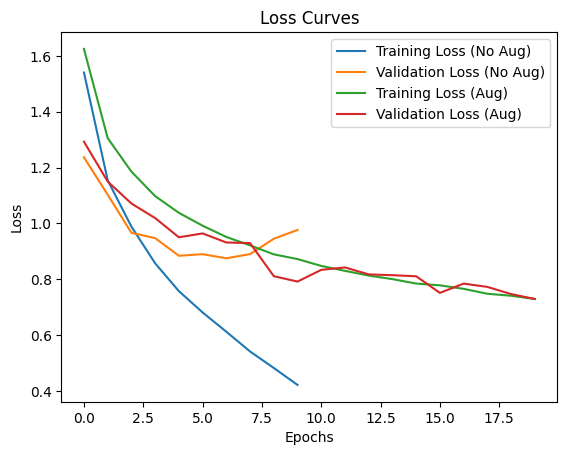

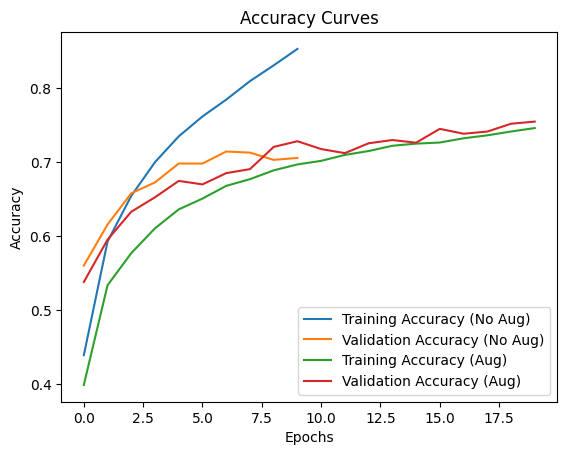

In [73]:
import matplotlib.pyplot as plt

# Plot loss curves
plt.plot(history.history['loss'], label='Training Loss (No Aug)')
plt.plot(history.history['val_loss'], label='Validation Loss (No Aug)')
plt.plot(history_aug.history['loss'], label='Training Loss (Aug)')
plt.plot(history_aug.history['val_loss'], label='Validation Loss (Aug)')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy (No Aug)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (No Aug)')
plt.plot(history_aug.history['accuracy'], label='Training Accuracy (Aug)')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy (Aug)')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Question 4: Implementing a Vanilla RNN for Next-Word Prediction

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import math
import gensim.downloader as api

Loading dataset

In [24]:
dataset = datasets.load_dataset("tiny_shakespeare")['train']

Tokenize words and vocabulary

In [25]:
# Tokenization & Vocabulary Creation
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(dataset['text'])
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

11914


target and input sequences

In [4]:
# Convert Text to Sequences with Fixed Length
fixed_seq_length = 10  # Set a reasonable sequence length
sequences = tokenizer.texts_to_sequences(dataset['text'])

input_sequences = []
output_words = []

for seq in sequences:
    if len(seq) >= fixed_seq_length:
        for i in range(len(seq) - fixed_seq_length):
            input_sequences.append(seq[i:i+fixed_seq_length])
            output_words.append(seq[i+fixed_seq_length])
            

In [16]:
print(len(input_sequences))

50000


In [5]:
# Reduce dataset size to avoid memory issues
sample_size = min(50000, len(input_sequences))
input_sequences = input_sequences[:sample_size]
output_words = output_words[:sample_size]

# Create TensorFlow Dataset
BUFFER_SIZE = 10000  # Shuffle buffer
BATCH_SIZE = 32  # Reduce batch size for memory efficiency

dataset_tf = tf.data.Dataset.from_tensor_slices((input_sequences, output_words))
dataset_tf = dataset_tf.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

**RNN Implementation**

In [7]:
# Define Vanilla RNN Model
class VanillaRNN(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, rnn_units):
        super(VanillaRNN, self).__init__()
        self.embedding = layers.Embedding(vocab_size, embedding_dim)
        self.rnn = layers.SimpleRNN(rnn_units, return_sequences=False)
        self.dense = layers.Dense(vocab_size, activation='softmax')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.rnn(x)
        return self.dense(x)


In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import callbacks

# Hyperparameters
embedding_dim = 64
rnn_units = 128
learning_rate = 0.001  # Set learning rate

# Initialize Model
model = VanillaRNN(vocab_size, embedding_dim, rnn_units)

# Define Optimizer with Learning Rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early Stopping Callback
early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Train Model
history = model.fit(dataset_tf, epochs=100, callbacks=[early_stopping])

# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0382 - loss: 7.0804
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0572 - loss: 6.1888
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0838 - loss: 5.7557
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0987 - loss: 5.3503
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1131 - loss: 4.9708
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1405 - loss: 4.6005
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1839 - loss: 4.2241
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2332 - loss: 3.8878
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2885 - loss: 3.5531
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3385 - loss: 3.2498
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3847 - loss: 2.9788
Epoch 12/100
1563/1

KeyboardInterrupt: 

In [26]:

# Text Generation Function
def generate_text(seed_text, next_words=10):
    for _ in range(next_words):
        tokenized_input = tokenizer.texts_to_sequences([seed_text])
        padded_input = tf.keras.preprocessing.sequence.pad_sequences(tokenized_input, maxlen=fixed_seq_length, padding='pre')
        predicted_word_index = np.argmax(model.predict(padded_input))
        predicted_word = tokenizer.index_word.get(predicted_word_index, '')
        seed_text += ' ' + predicted_word
    return seed_text

# Generate Sample Text
seed_phrase = "To be or not to"
print(generate_text(seed_phrase))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
To be or not to them his friends not have their hearts for his country


In [27]:
# Model Evaluation
BATCH_SIZE_EVAL = 128  # Reduce memory usage
y_pred = []
for batch in tf.data.Dataset.from_tensor_slices(input_sequences).batch(BATCH_SIZE_EVAL):
    batch_pred = np.argmax(model.predict_on_batch(batch), axis=1)
    y_pred.extend(batch_pred)

y_pred = np.array(y_pred)
accuracy = accuracy_score(output_words, y_pred)
print(f'Word-Level Accuracy: {accuracy * 100:.2f}%')

Word-Level Accuracy: 81.32%


**Word2Vec Pretrained**

In [28]:
# Hyperparameters
embedding_dim = 300  # Adjusted to match Word2Vec
rnn_units = 128

# Load Pretrained Word2Vec Embeddings
word2vec_model = api.load("word2vec-google-news-300")
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]

# Initialize Model with Pretrained Embeddings
embedding_layer = layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False)


In [30]:
class PretrainedRNN(tf.keras.Model):
    def __init__(self, vocab_size, embedding_layer, rnn_units):
        super(PretrainedRNN, self).__init__()
        self.embedding = embedding_layer
        self.rnn = layers.SimpleRNN(rnn_units, return_sequences=False)
        self.dense = layers.Dense(vocab_size, activation='softmax')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.rnn(x)
        return self.dense(x)

pretrained_model = PretrainedRNN(vocab_size, embedding_layer, rnn_units)
pretrained_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0418 - loss: 7.0374
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0715 - loss: 6.0752
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0849 - loss: 5.6935
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0890 - loss: 5.3412
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1003 - loss: 5.0013
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1154 - loss: 4.6977
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1422 - loss: 4.4218
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1861 - loss: 4.1552
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2224 - loss: 3.9208
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2525 - loss: 3.7301
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2778 - loss: 3.5743
Epoch 12/100
1563/1

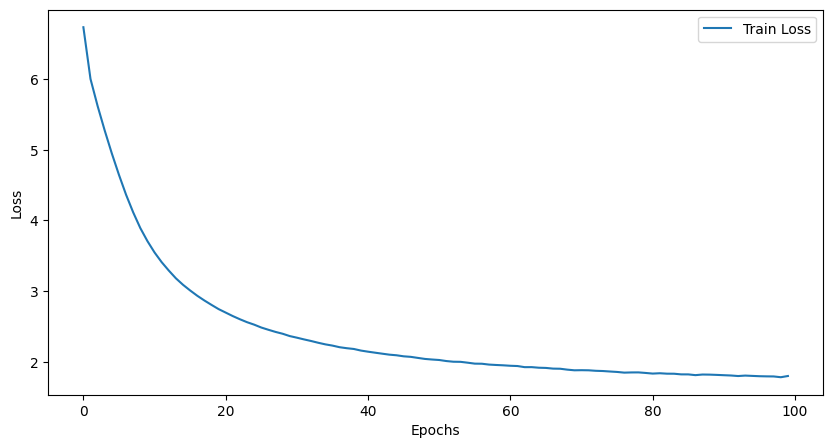

In [31]:
# Train Model
early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
history = pretrained_model.fit(dataset_tf, epochs=100, callbacks=[early_stopping])

# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [35]:
# Compute Perplexity
def compute_perplexity(loss):
    return math.exp(loss)

perplexity = compute_perplexity(history.history['loss'][-1])
print(f'Final Perplexity: {perplexity:.2f}')

# Evaluate Model
y_pred = []
for batch in tf.data.Dataset.from_tensor_slices(input_sequences).batch(128):
    batch_pred = np.argmax(pretrained_model.predict_on_batch(batch), axis=1)
    y_pred.extend(batch_pred)

y_pred = np.array(y_pred)
accuracy = accuracy_score(output_words, y_pred)
print(f'Word-Level Accuracy: {accuracy * 100:.2f}%')

Final Perplexity: 6.04
Word-Level Accuracy: 55.91%


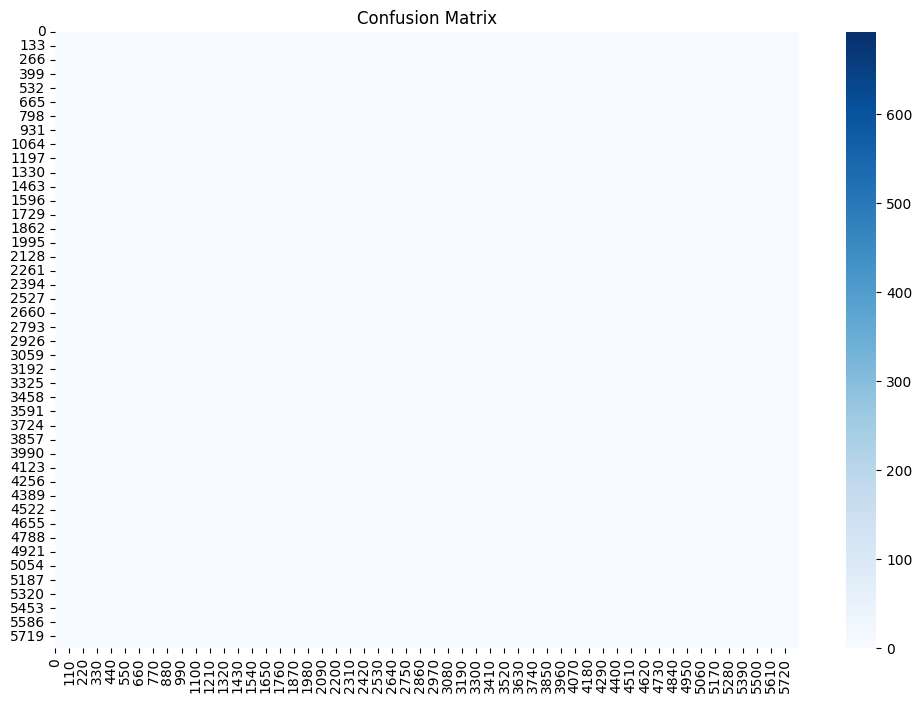

In [36]:
# Confusion Matrix
cm = confusion_matrix(output_words, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, cmap='Blues', annot=False)
plt.title('Confusion Matrix')
plt.show()


# Question 5: Hyperparameter Search for CNN and RNN

Loading datasets

In [5]:
# CIFAR-10 dataset from Hugging Face
datasetCNN = load_dataset("cifar10")
datasetRNN = datasets.load_dataset("tiny_shakespeare")['train']

README.md:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/120M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/6.10k [00:00<?, ?B/s]

tiny_shakespeare.py:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

The repository for tiny_shakespeare contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/tiny_shakespeare.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


Generating train split:   0%|          | 0/1 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1 [00:00<?, ? examples/s]

RNN Tokenization, Vocabulary and Input Sequences

In [12]:
# Tokenization & Vocabulary Creation
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(datasetRNN['text'])
vocab_size = len(tokenizer.word_index) + 1
print(f'Vocabulary Size: {vocab_size}')

Vocabulary Size: 11914


In [13]:


# Convert Text to Sequences with Fixed Length
fixed_seq_length = 10  # Set a reasonable sequence length
sequences = tokenizer.texts_to_sequences(datasetRNN['text'])

input_sequences = []
output_words = []

for seq in sequences:
    if len(seq) >= fixed_seq_length:
        for i in range(len(seq) - fixed_seq_length):
            input_sequences.append(seq[i:i + fixed_seq_length])
            output_words.append(seq[i + fixed_seq_length])

# Reduce dataset size to avoid memory issues
sample_size = min(50000, len(input_sequences))
input_sequences = input_sequences[:sample_size]
output_words = output_words[:sample_size]

# Convert output_words to one-hot encoding
output_words = tf.keras.utils.to_categorical(output_words, num_classes=vocab_size)

# Create TensorFlow Dataset
BUFFER_SIZE = 10000  # Shuffle buffer
BATCH_SIZE = 32  # Reduce batch size for memory efficiency

dataset_tf = tf.data.Dataset.from_tensor_slices((input_sequences, output_words))
dataset_tf = dataset_tf.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


CNN Data Preparation

In [8]:
# Extract images and labels
train_images = np.array([np.array(image) for image in datasetCNN["train"]["img"]])
train_labels = np.array(datasetCNN["train"]["label"])
test_images = np.array([np.array(image) for image in datasetCNN["test"]["img"]])
test_labels = np.array(datasetCNN["test"]["label"])

# Normalize pixel values to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoded format
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Split the training data into training and validation sets (80% training, 20% validation)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

Model Definition

In [9]:
# Define CNN Model
class CNNModel(tf.keras.Model):
    def __init__(self, filters, kernel_size, stride, dropout_rate, activation, weight_init):
        super(CNNModel, self).__init__()
        self.conv1 = layers.Conv2D(filters, kernel_size, strides=stride, activation=activation,
                                   kernel_initializer=weight_init, input_shape=(32, 32, 3))
        self.pool1 = layers.MaxPooling2D((2, 2))
        self.conv2 = layers.Conv2D(filters * 2, kernel_size, strides=stride, activation=activation)
        self.pool2 = layers.MaxPooling2D((2, 2))
        self.flatten = layers.Flatten()
        self.dropout = layers.Dropout(dropout_rate)
        self.fc = layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dropout(x)
        return self.fc(x)

# Define RNN Model
class VanillaRNN(tf.keras.Model):
    def __init__(self, vocab_size, rnn_units, dropout_rate, activation):
        super(VanillaRNN, self).__init__()
        self.embedding = layers.Embedding(vocab_size, 128)
        self.rnn = layers.SimpleRNN(rnn_units, activation=activation, return_sequences=False)
        self.dropout = layers.Dropout(dropout_rate)
        self.dense = layers.Dense(vocab_size, activation='softmax')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.rnn(x)
        x = self.dropout(x)
        return self.dense(x)

Hyperparameter Search

In [17]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import train_test_split

# Function to Perform Random Hyperparameter Search
def random_hyperparameter_search(model_type, trials=10):
    best_acc = 0.0
    best_params = None
    
    for _ in range(trials):
        if model_type == 'CNN':
            params = {
                'filters': random.choice([32, 64, 128]),
                'kernel_size': random.choice([(3, 3), (5, 5)]),
                'stride': random.choice([1, 2]),
                'activation': random.choice(['relu', 'tanh', 'sigmoid']),
                'dropout_rate': random.choice([0.2, 0.3, 0.5]),
                'weight_init': random.choice(['glorot_uniform', 'he_normal'])
            }
            learning_rate = random.choice([0.01, 0.001, 0.0001])
            optimizer_name = random.choice(['adam', 'rmsprop', 'sgd'])
            
            model = CNNModel(
                filters=params['filters'],
                kernel_size=params['kernel_size'],
                stride=params['stride'],
                activation=params['activation'],
                dropout_rate=params['dropout_rate'],
                weight_init=params['weight_init']
            )
            
        elif model_type == 'RNN':
            params = {
                'rnn_units': random.choice([64, 128, 256]),
                'dropout_rate': random.choice([0.2, 0.3, 0.5]),
                'activation': random.choice(['relu', 'tanh', 'sigmoid'])
            }
            learning_rate = random.choice([0.01, 0.001, 0.0001])
            optimizer_name = random.choice(['adam', 'rmsprop', 'sgd'])
            
            model = VanillaRNN(
                vocab_size=vocab_size,
                rnn_units=params['rnn_units'],
                dropout_rate=params['dropout_rate'],
                activation=params['activation']
            )
        
        # Choose optimizer
        if optimizer_name == 'adam':
            optimizer = Adam(learning_rate=learning_rate)
        elif optimizer_name == 'rmsprop':
            optimizer = RMSprop(learning_rate=learning_rate)
        else:
            optimizer = SGD(learning_rate=learning_rate)
        
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
        # Select appropriate dataset
        if model_type == 'CNN':
            history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels),
                                epochs=15, batch_size=32, verbose=0)
            val_acc = max(history.history['val_accuracy'])
        else:
            history = model.fit(dataset_tf, epochs=70, verbose=0)
            val_acc = history.history['accuracy'][-1]
        
        # Update best hyperparameters
        if val_acc > best_acc:
            best_acc = val_acc
            best_params = {**params, 'learning_rate': learning_rate, 'optimizer': optimizer_name}
    
    return best_params, best_acc

In [ ]:
# Run Hyperparameter Search
best_cnn_params, best_cnn_acc = random_hyperparameter_search('CNN')

print(f'Best CNN Params: {best_cnn_params}, Accuracy: {best_cnn_acc}')




Best CNN Params: {'filters': 64, 'kernel_size': (3, 3), 'stride': 1, 'activation': 'tanh', 'dropout_rate': 0.2, 'weight_init': 'he_normal', 'learning_rate': 0.001, 'optimizer': 'rmsprop'}, Accuracy: 0.6444000005722046


In [16]:
best_rnn_params, best_rnn_acc = random_hyperparameter_search('RNN')

print(f'Best RNN Params: {best_rnn_params}, Accuracy: {best_rnn_acc}')


Best RNN Params: {'rnn_units': 128, 'dropout_rate': 0.3, 'activation': 'relu', 'learning_rate': 0.001, 'optimizer': 'adam'}, Accuracy: 0.11890000104904175
